<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/observability/LlamaDebugHandler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PromptLayer Handler
[PromptLayer](https://promptlayer.com) is an LLMOps tool to help manage prompts, check out the [features](https://docs.promptlayer.com/introduction). Currently we only support OpenAI for this integration.

If you're opening this Notebook on colab, you will probably need to install LlamaIndex 🦙 and PromptLayer.

In [ ]:
!pip install llama-index
!pip install promptlayer

## Configure API keys

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "sk-..."
os.environ["PROMPTLAYER_API_KEY"] = "pl_..."

## Download Data

In [ ]:
!mkdir -p 'data/paul_graham/'
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt' -O 'data/paul_graham/paul_graham_essay.txt'

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/loganm/.wget-hsts'. HSTS will be disabled.
--2023-11-29 21:09:27--  https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75042 (73K) [text/plain]
Saving to: ‘data/paul_graham/paul_graham_essay.txt’

data/paul_graham/pa 100%[===================>]  73.28K  --.-KB/s    in 0.04s   

2023-11-29 21:09:28 (1.76 MB/s) - ‘data/paul_graham/paul_graham_essay.txt’ saved [75042/75042]



In [ ]:
from llama_index.core import SimpleDirectoryReader

docs = SimpleDirectoryReader("./data/paul_graham/").load_data()

## Callback Manager Setup

In [ ]:
from llama_index.core import set_global_handler

# pl_tags are optional, to help you organize your prompts and apps
set_global_handler("promptlayer", pl_tags=["paul graham", "essay"])

## Trigger the callback with a query

In [ ]:
from llama_index.core import VectorStoreIndex

index = VectorStoreIndex.from_documents(docs)
query_engine = index.as_query_engine()

In [ ]:
response = query_engine.query("What did the author do growing up?")

## Access [promptlayer.com](https://promptlayer.com) to see stats

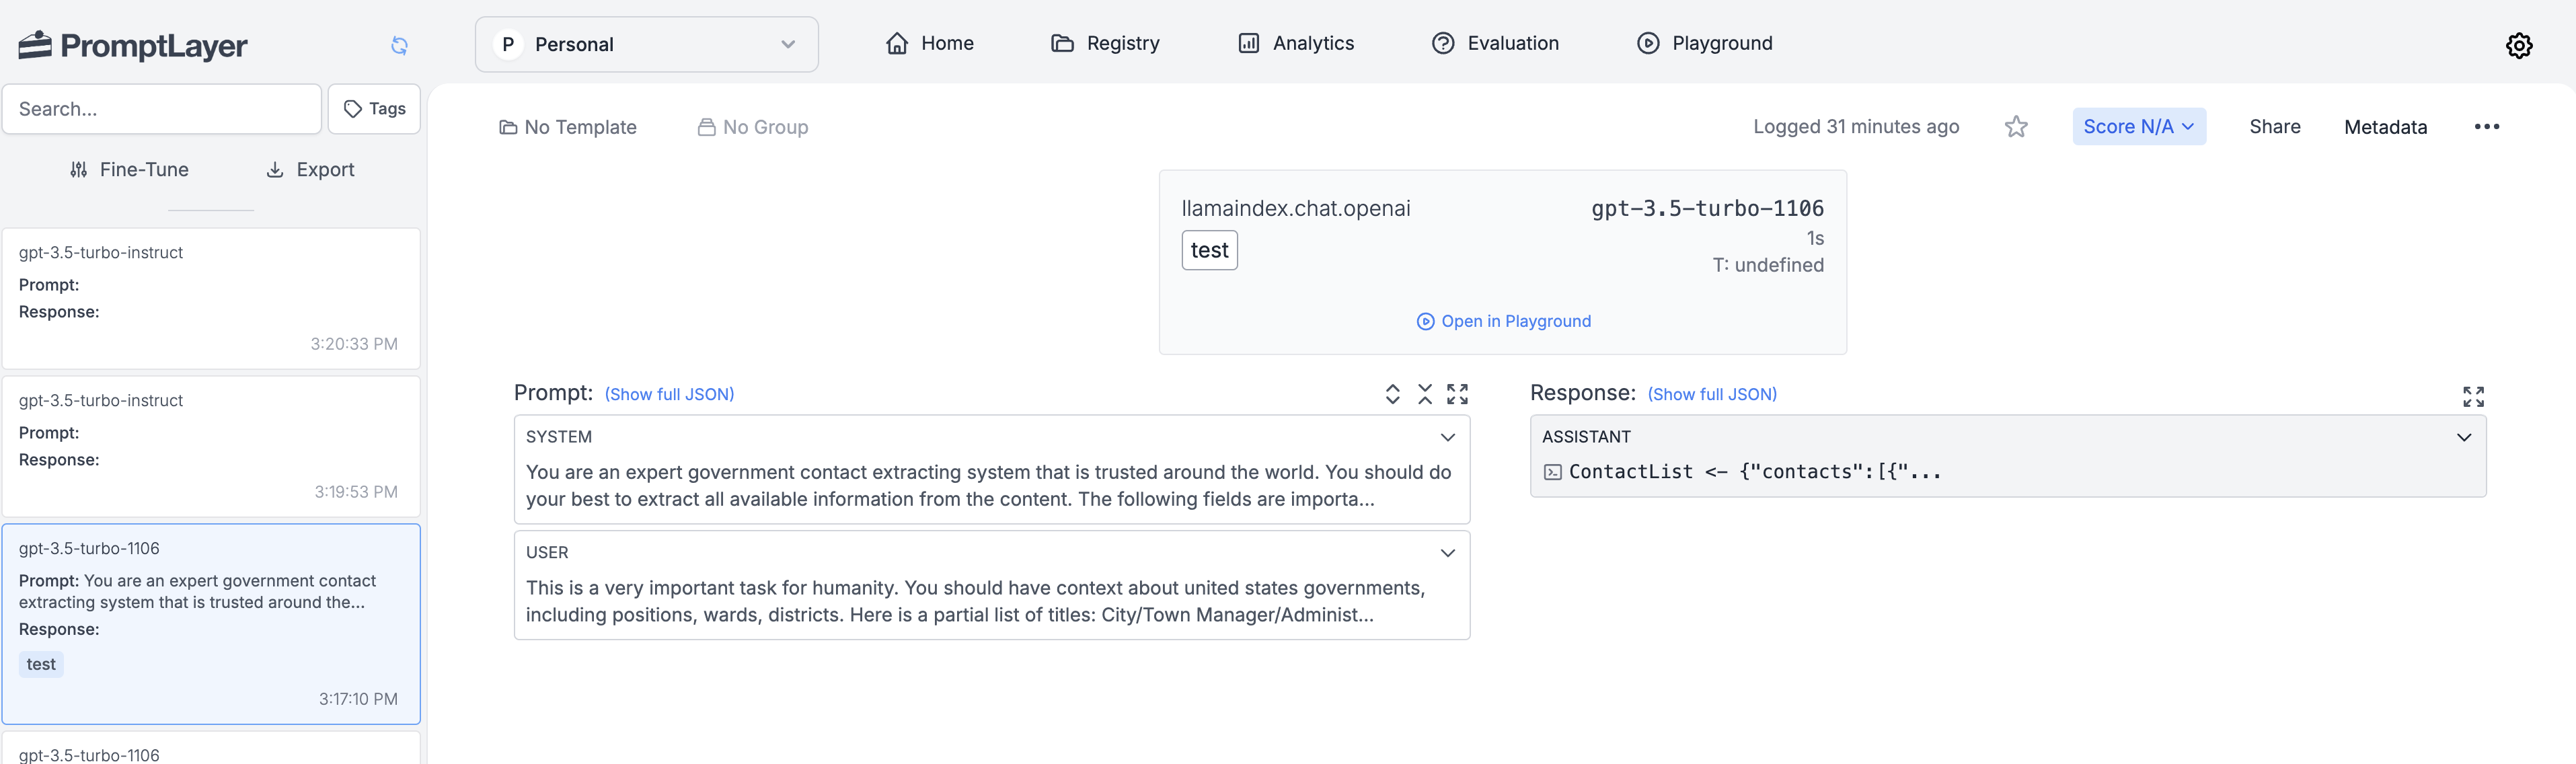